In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('클래스 레이블', np.unique(y))
## 0은 Setosa, 1은 Versicolor, 2는 Virginica 임.
## 사이킷런은 여러가지 데이터셋을 제공하니 참고

클래스 레이블 [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
### 사이킷런에는 train set과 test set을 자동으로 나눠주는 클래스가 존재함.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # 데이터셋 표준화도 자동으로 해주는 클래스도 존재함.
sc.fit(X_train) # fit 메서드는 X_train에 있는 특성을 뽑아서 평균, 표준편차 등등을 모델에 저장함.
X_train_std = sc.transform(X_train) # transform을 통해 실제로 표준화 하여 std를 반환함.
X_test_std = sc.transform(X_test)

from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1) # eta0은 learning rate
ppn.fit(X_train_std, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,1


In [5]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' %(y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(ppn.score(X_test_std, y_test))

0.9777777777777777
0.9777777777777777


C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


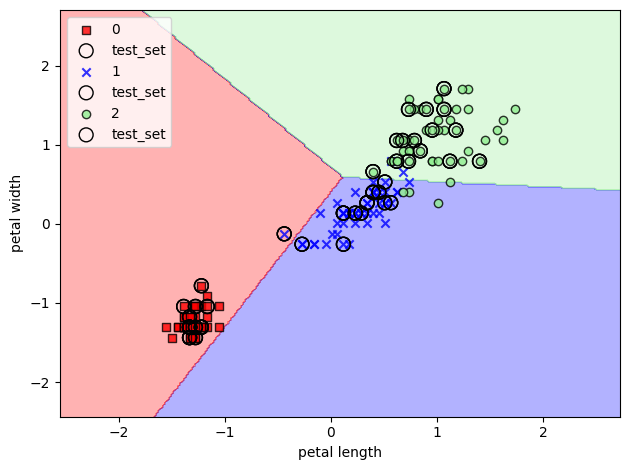

In [7]:
from matplotlib.colors import ListedColormap

### Decision boundary를 그려주는 함수

def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # np.arange(X) 0부터 x까지 1차원 배열로 만들어주는 함수
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # np.ravel() n차원의 이상의 함수를 1차원으로 flatten 해주는 함수
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1],
                        c='none', edgecolor='black', alpha=1.0,
                        linewidth=1, marker='o',
                        s=100, label='test_set')
    
### Decision boundary 출력
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#책의 예제보단 더 잘 분류하긴 하지만(버전차이 같음.) 여전히 선형으로는 확실히 분류오차가 생김

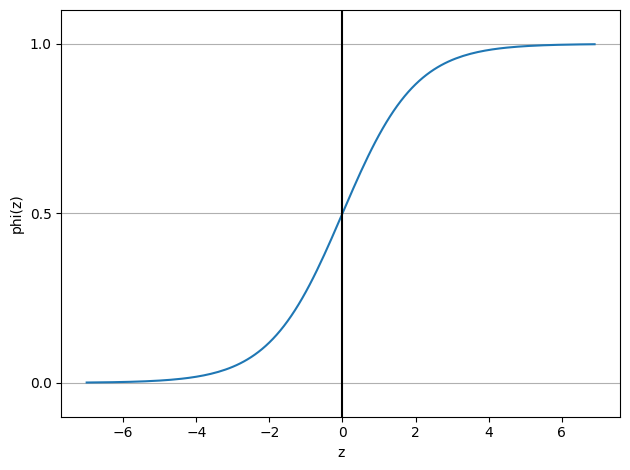

In [8]:
### 시그모이드 function 시각화

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) # 1 / 1 + e^-1

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

# 출력
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('phi(z)')
plt.yticks([0.0, 0.5, 1.0])

ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout() # 요거하면 조금 더 화면이 커짐
plt.show() # 시그모이드 function은 s자를 그리며 z값이 매우커지거나 매우 작아진다면 0에 수렴하게됨.

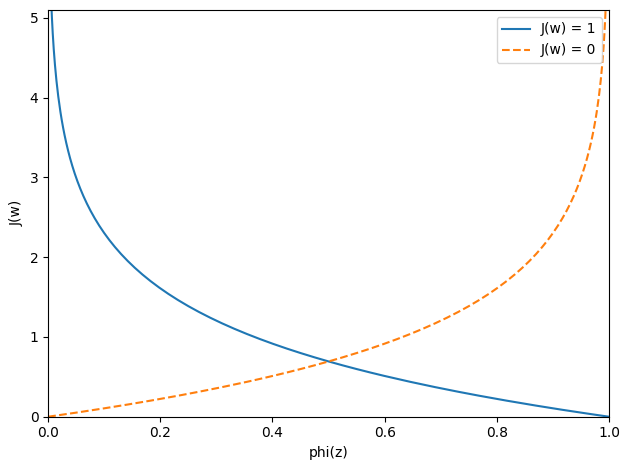

In [9]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1) # np.linspace와 거의 비슷 얘는 스텝을 기준으로 생성
                            # np.linspace는 숫자를 기준으로 생성
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c1, label='J(w) = 1')
plt.plot(phi_z, c0, linestyle='--', label='J(w) = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

plt.xlabel('phi(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 그래프를 보면 phi(z)가 더 잘맞췄을수록 cost가 완전 0에 가깝게, 틀리면 틀릴수록 완전 무한대에 가깝게 cost를 부여함.


C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


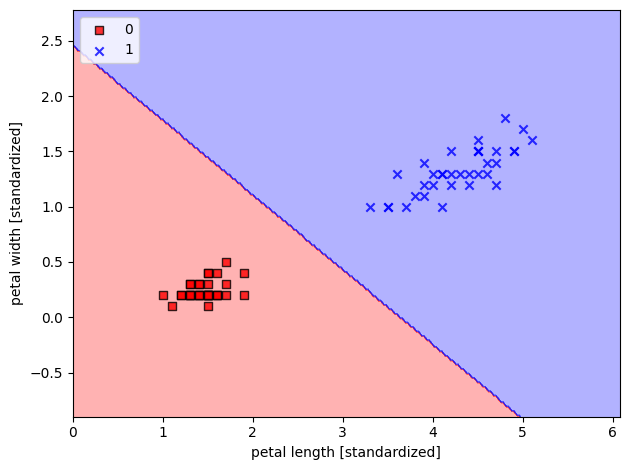

In [10]:

class LogisticRegressionGD(object):
    # 생성자
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    # 학습 함수
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

### Adaline 함수와 activation function과 loss function만 바꿔주면 됨.

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,

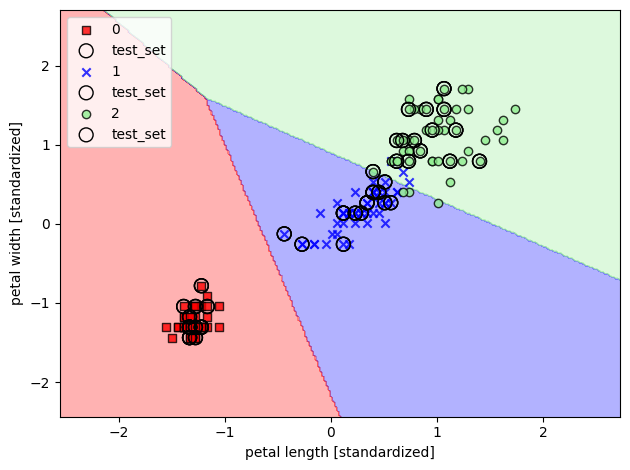

In [11]:
### Logistic Regression은 그냥 쌩으로 구현도 가능하지만, sklearn에서 클래스로 지원한다.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', 
                        C=100, random_state=1)
lr.fit(X_combined_std, y_combined) # 이번엔 binary classification이 아닌 multiple classification을 구현
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 역시 잘 분류하는걸 볼 수 있음.

c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoi

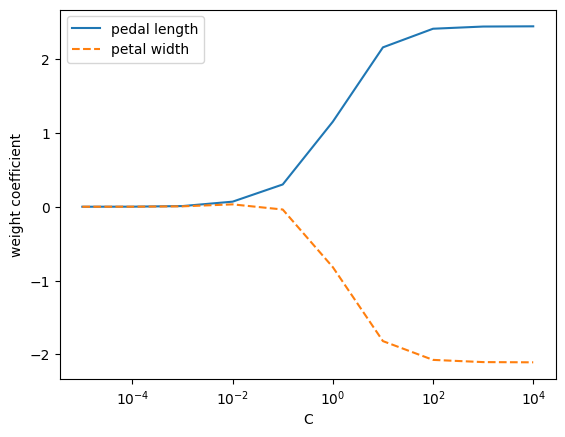

In [12]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    ## 여기서 C는 역규제이다. 그래서 C를 감소 시킬수록 규제가 강해진다.
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)

plt.plot(params, weights[:, 0],
         label='pedal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# 그래프에 보이지만, C값이 낮아지면 낮아질수록 규제가 더 심해지니 weight가 거의 학습을 못해서 0으로 수렴하는걸 볼 수 있다.


C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


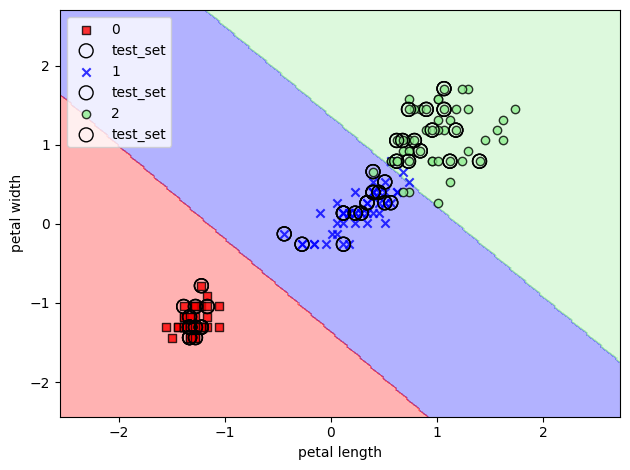

In [13]:
### 서포트 벡터 머신

from sklearn.svm import SVC

# support vector classifier 클래스를 사이킷런에서 제공함.
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 약간은 오분류가 존재하지만 그래도 이진 분류로는 절대로 분류 못하는 문제를 해결 할 수 있음.

In [14]:
### Stochastic Gradient Descent Classifier의 여러 쓰임새
### 인자로 어떤 loss function을 넣느냐에 따라서 다른 모델로 학습함.

from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron') # 퍼셉트론을 넣으면 퍼셉트론 규칙을 따르는 분류모델
lr = SGDClassifier(loss='log') # log를 넣으면 크로스 엔트로피를 따르는 Logistic Regression
svm = SGDClassifier(loss='hinge') # 힌지를 넣으면 힌지로스를 따르는 SVM을 생성 할 수 있음.

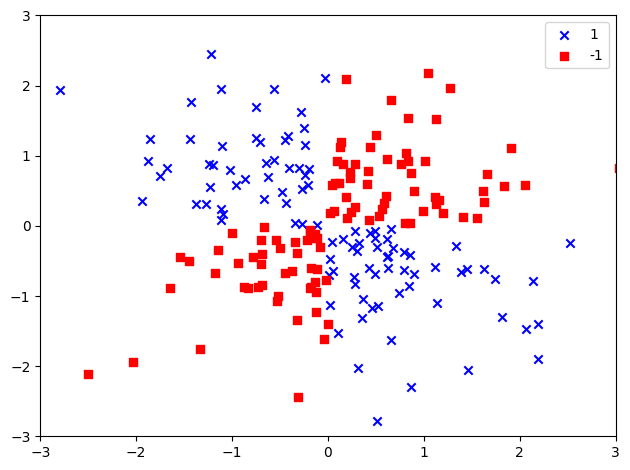

In [15]:
### 비선형 문제를 풀기 위한 커널 SVM
### 선형 분류 모델은 절대로 XOR문제를 풀 수 없음..
### 이를 해결하기 위한 모델

np.random.seed(1)

X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# 1 or -1 에 따라 scatter로 산점도를 그려봄  
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')

plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r', marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 표를 보면 선형으로는 절대 표현 할 수없는 그런 산점도가 나오게 된다.

C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


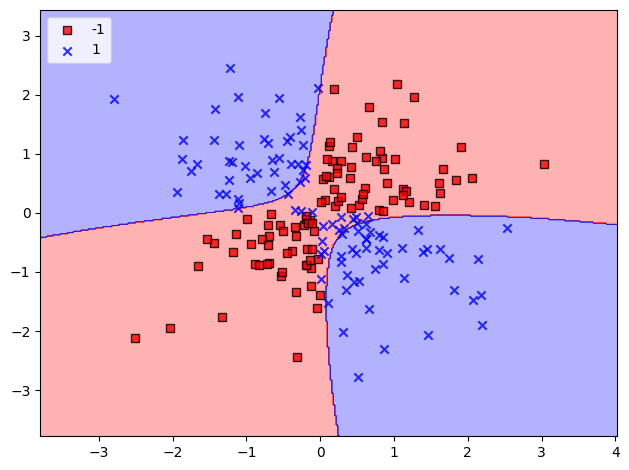

In [16]:
### 아까 SVC에서 커널 인자가 있었는데, Linear가 아닌 rbf로 넣어주면,
### 방사 기저 함수를 따르는 비선형 분류 모델로 사용 할 수 있음.

svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 가우시안 커널을 따르는 SVM머신 완벽하게는 아니지만, XOR Problem을 어느정도 해결 할 수 있음.
### SVC()에서 감마값을 조절하여 서포트 벡터의 영향을 줄일 수 있음.

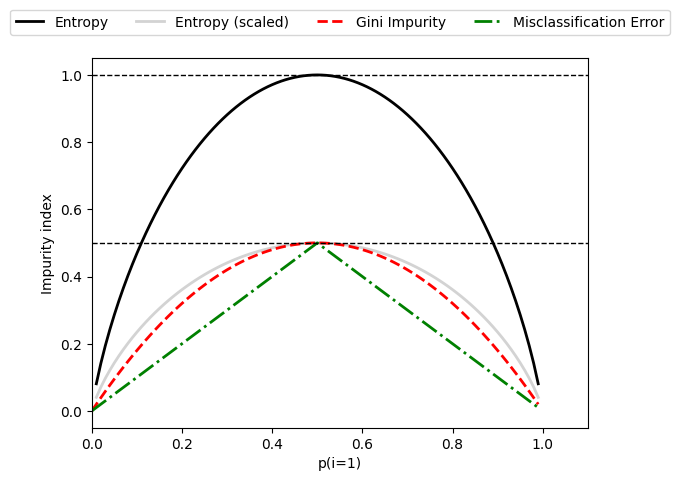

In [17]:
### Decision Tree

def gini(p):
    return (p) * (1 - (p)) + (1 - p) * (1- (1-p))

def entropy(p):
    return - p * np.log2(p) - (1-p) * np.log2((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.xlim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.show()

C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


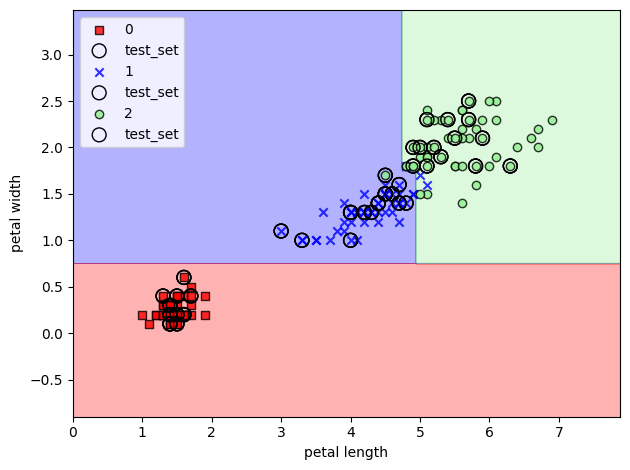

0.9733333333333334


In [18]:
from sklearn.tree import DecisionTreeClassifier

# 지니 불순도를 사용하여 최대 4깊이의 Decision Tree 생성
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train) # 결정트리에서는 표준화되지 않은 데이터셋을 사용함.

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(tree.score(X_combined, y_combined))
## 지금까지 배운 알고리즘중에 제일 잘 분류함.

0.9866666666666667


C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


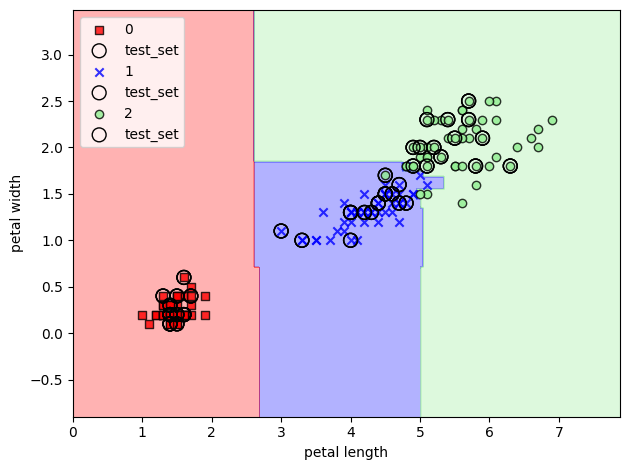

In [19]:
from sklearn.ensemble import RandomForestClassifier

# 지니 불순도를 사용하고, 25개의 결정트리의 평균을 내는 RandomForestClassifier를 생성
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
print(forest.score(X_combined, y_combined))
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### .score 메서드를 통해 실제로 테스트 데이터셋과 비교해서 accuracy를 내볼수 있다.
### 위에서 설명한 DecisionTree와 비교했을때, 정확도가 약간 더 향상된걸 볼 수 있다.


C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


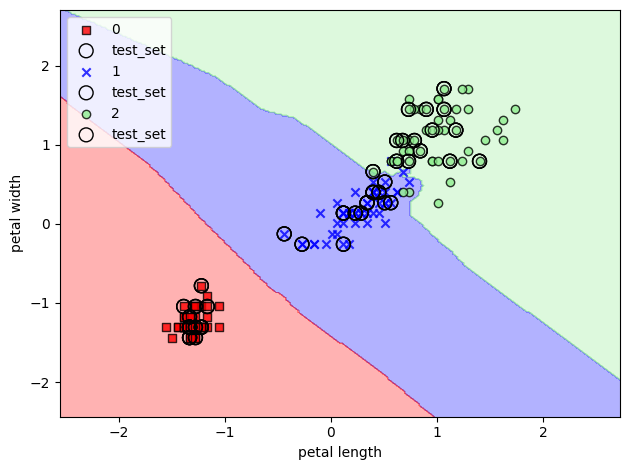

In [20]:
### K-NN 알고리즘

from sklearn.neighbors import KNeighborsClassifier

### 주변 이웃 5개를 보고 판단하는 K-NN Classifier
### 거리 기준이 데이터셋마다 굉장히 중요한데, P 인자를 통해 맨하탄 OR 유클리드 방식으로 선택할 수 있다.
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 거의 완벽하게 다 구분....

0.44360902255639095


C:\Users\조승현\AppData\Local\Temp\ipykernel_520\1904072576.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


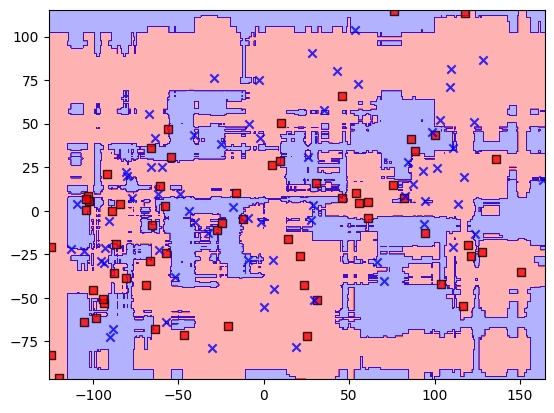

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes.csv")

X = df.drop(columns=['SEX'])
y = df['SEX']

# 1) 먼저 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 2) PCA를 train에 fit하고 train/test 둘 다 변환
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 3) RandomForest를 PCA된 데이터로 학습
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train_pca, y_train)

# 4) 테스트 점수도 PCA된 데이터로 평가
print(rfc.score(X_test_pca, y_test))

# 5) 결정 경계 그리기
plot_decision_regions(X_test_pca, y_test, classifier=rfc, resolution=0.1)
plt.show()
